In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt


In [3]:
dfTrain = pd.read_csv('housing_train.csv')
dfTest = pd.read_csv('housing_test.csv')

In [4]:
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
dfTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
dfTrain.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [7]:
dfTrain_null = dfTrain.isnull().sum()
dfTrain_null

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
print([dfTrain_null[dfTrain_null>0]/dfTrain.shape[0]])

[LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64]


In [9]:
dfTest_null = dfTest.isnull().sum()
dfTest_null

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [10]:
print([dfTest_null[dfTest_null>0]/dfTest.shape[0]])

[MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64]


In [11]:
dfTest.drop([ 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)


In [12]:
dfTrain.fillna(dfTrain.mean())
dfTrain.dropna(axis = 1, inplace = True)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [13]:
dfTrainCat = ['MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'
                          , 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'
                          , 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional'
                          , 'PavedDrive', 'SaleType', 'SaleCondition']

dfTrain[dfTrainCat] = dfTrain[dfTrainCat].apply(LabelEncoder().fit_transform)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int32
 5   LotShape       1460 non-null   int32
 6   LandContour    1460 non-null   int32
 7   Utilities      1460 non-null   int32
 8   LotConfig      1460 non-null   int32
 9   LandSlope      1460 non-null   int32
 10  Neighborhood   1460 non-null   int32
 11  Condition1     1460 non-null   int32
 12  Condition2     1460 non-null   int32
 13  BldgType       1460 non-null   int32
 14  HouseStyle     1460 non-null   int32
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

In [14]:
dfTest.fillna(dfTest.mean())
dfTest.dropna(axis = 1, inplace = True)
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  OverallQual    1459 non-null   int64 
 14  OverallCond    1459 non-null   int64 
 15  YearBuilt      1459 non-null   int64 
 16  YearRemodAdd   1459 non-null   int64 
 17  RoofStyle      1459 non-null   object
 18  RoofMatl       1459 non-null

In [15]:
dfTestCat = ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType'
            , 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir'
            , 'Electrical', 'PavedDrive', 'SaleCondition']

dfTest[dfTestCat] = dfTest[dfTestCat].apply(LabelEncoder().fit_transform)
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1459 non-null   int64
 1   MSSubClass     1459 non-null   int64
 2   LotArea        1459 non-null   int64
 3   Street         1459 non-null   int32
 4   LotShape       1459 non-null   int32
 5   LandContour    1459 non-null   int32
 6   LotConfig      1459 non-null   int32
 7   LandSlope      1459 non-null   int32
 8   Neighborhood   1459 non-null   int32
 9   Condition1     1459 non-null   int32
 10  Condition2     1459 non-null   int32
 11  BldgType       1459 non-null   int32
 12  HouseStyle     1459 non-null   int32
 13  OverallQual    1459 non-null   int64
 14  OverallCond    1459 non-null   int64
 15  YearBuilt      1459 non-null   int64
 16  YearRemodAdd   1459 non-null   int64
 17  RoofStyle      1459 non-null   int32
 18  RoofMatl       1459 non-null   int32
 19  ExterQ

In [16]:
Co_Train = dfTrain.corr()
Co_Train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


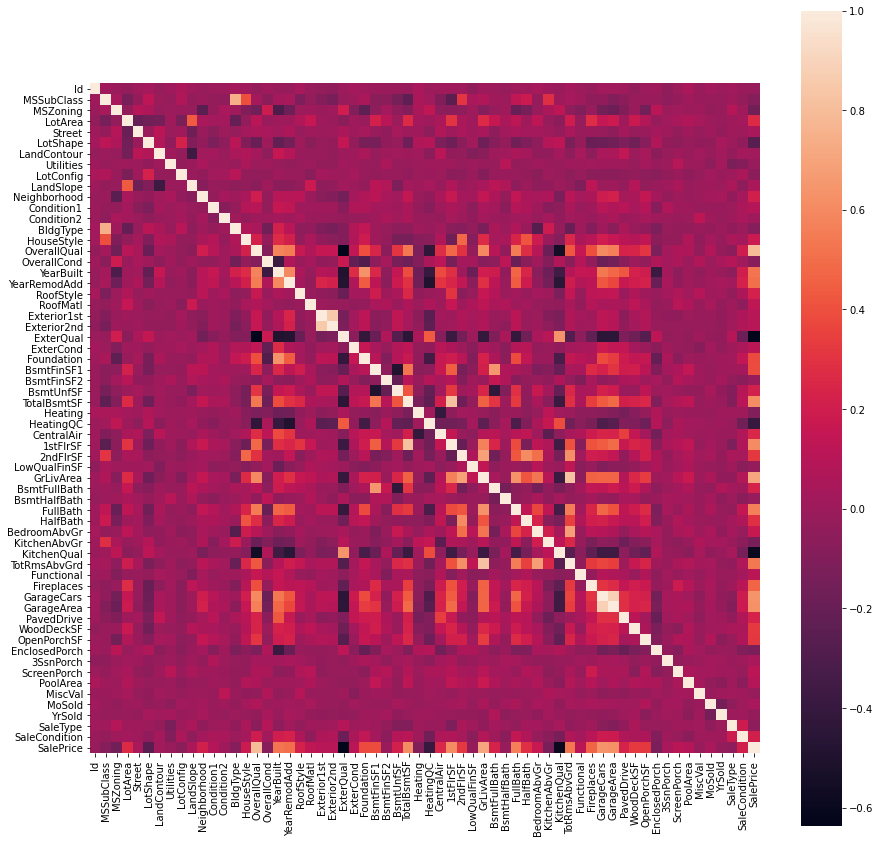

In [17]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(Co_Train, square = True)
plt.show()

In [18]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int32
 5   LotShape       1460 non-null   int32
 6   LandContour    1460 non-null   int32
 7   Utilities      1460 non-null   int32
 8   LotConfig      1460 non-null   int32
 9   LandSlope      1460 non-null   int32
 10  Neighborhood   1460 non-null   int32
 11  Condition1     1460 non-null   int32
 12  Condition2     1460 non-null   int32
 13  BldgType       1460 non-null   int32
 14  HouseStyle     1460 non-null   int32
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

In [19]:
data = pd.concat((dfTrain, dfTest))
data = data.dropna(axis = 1)
data['SalePrice'] = dfTrain['SalePrice']
data = data.drop('Id', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     2919 non-null   int64
 1   LotArea        2919 non-null   int64
 2   Street         2919 non-null   int32
 3   LotShape       2919 non-null   int32
 4   LandContour    2919 non-null   int32
 5   LotConfig      2919 non-null   int32
 6   LandSlope      2919 non-null   int32
 7   Neighborhood   2919 non-null   int32
 8   Condition1     2919 non-null   int32
 9   Condition2     2919 non-null   int32
 10  BldgType       2919 non-null   int32
 11  HouseStyle     2919 non-null   int32
 12  OverallQual    2919 non-null   int64
 13  OverallCond    2919 non-null   int64
 14  YearBuilt      2919 non-null   int64
 15  YearRemodAdd   2919 non-null   int64
 16  RoofStyle      2919 non-null   int32
 17  RoofMatl       2919 non-null   int32
 18  ExterQual      2919 non-null   int32
 19  ExterC

In [20]:
X = data.iloc[:, 1:]
y = data.SalePrice


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)


r = DecisionTreeClassifier(max_depth=2)
r = r.fit(X_train, y_train) 


y_pred = r.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.04280821917808219


In [ ]:
y_

In [21]:
r = DecisionTreeRegressor(max_depth = 3)
r.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [22]:
y_pred = r.predict(X)


In [23]:
Mae =sqrt(mean_absolute_error(y, y_pred))
Mse = mean_squared_error(y, y_pred)
R2 = r2_score(list(y),list(y_pred))

In [24]:
print('MAE: ', Mae)
print('MSE: ', Mse)
print('R2: ', R2)

MAE:  108.05386487143767
MSE:  242649971.98845613
R2:  0.9615364320904501


In [38]:
data["y_pred"] = y_pred
data

conditions = [(data['SalePrice'] <= 100000),
              (data['SalePrice'] > 100001) & (dfTrain['SalePrice'] <= 500000),
              (data['SalePrice'] > 500001)]

values = ['Low', 'Medium', 'High']

data['Cat'] = np.select(conditions, values)
data['Cat'].value_counts()
data['Cat'] = data['Cat']
data

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,y_pred,Cat
0,60,8450,1,3,3,4,0,5,2,2,...,0,0,0,0,2,2008,4,208500,199438.327014,Medium
1,20,9600,1,3,3,2,0,24,1,2,...,0,0,0,0,5,2007,4,181500,167124.684746,Medium
2,60,11250,1,0,3,4,0,5,2,2,...,0,0,0,0,9,2008,4,223500,246177.647368,Medium
3,70,9550,1,0,3,0,0,6,2,2,...,0,0,0,0,2,2006,0,140000,132932.730539,Medium
4,60,14260,1,0,3,2,0,15,2,2,...,0,0,0,0,12,2008,4,250000,246177.647368,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,1,3,3,4,0,10,2,2,...,0,0,0,0,6,2006,4,185000,199438.327014,Medium
1455,160,1894,1,3,3,4,0,10,2,2,...,0,0,0,0,4,2006,0,175000,167124.684746,Medium
1456,20,20000,1,3,3,4,0,11,2,2,...,0,0,0,0,9,2006,0,210000,199438.327014,Medium
1457,85,10441,1,3,3,4,0,11,2,2,...,0,0,0,700,7,2006,4,266500,246177.647368,Medium


<BarContainer object of 2919 artists>

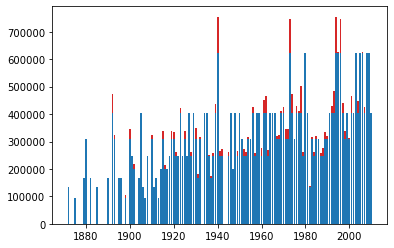

In [26]:
fig, ax = plt.subplots()
year = data['YearBuilt']
price = data['SalePrice']
pred = data['y_pred']

ax.bar(year, price, color = 'tab:red')
ax.bar(year, pred, color = 'tab:blue')

In [27]:
print("profundidad ", r.get_depth())
print("aributos ", r.feature_importances_)

profundidad  3
aributos  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


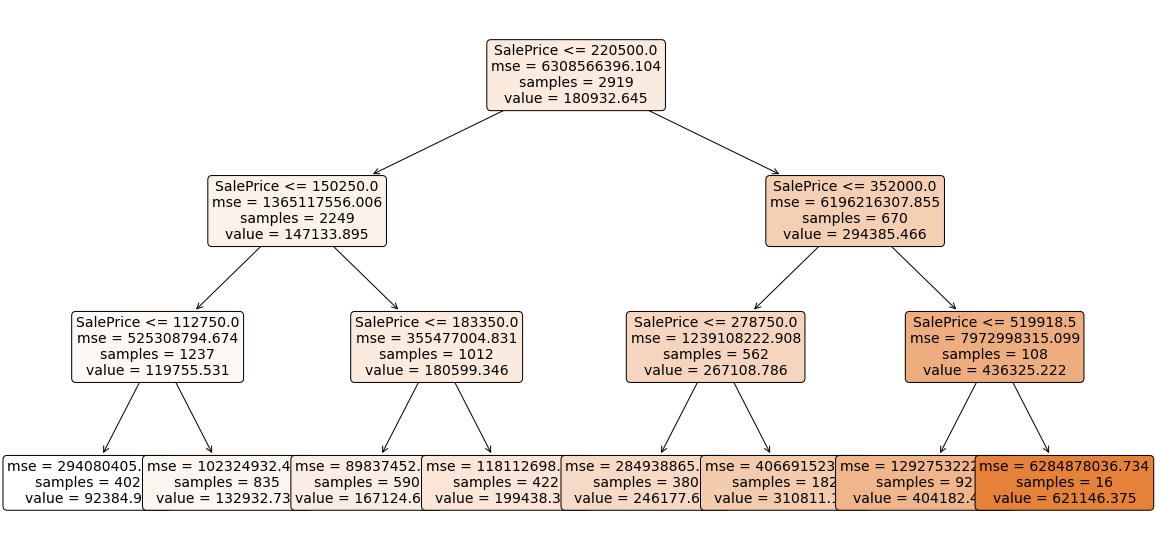

In [28]:
dt_feature_names = list(X_train)
plt.figure(figsize=(20,10))
a = plot_tree(r, feature_names=dt_feature_names,
              filled=True, 
              rounded=True, 
              fontsize=14)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 12345, shuffle = False)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
fcst = rf.predict(X_test)

r2_ = r2_score(list(y_test), list(fcst))
print ('r2: ',r2_)

r2:  0.9982875379277745


In [39]:
L_reg = DecisionTreeRegressor(max_depth = 8, min_samples_split = 52)
L_reg.fit(X_train, y_train)
y_pred2 = L_reg.predict(X)
MSE = np.sqrt(mean_squared_error(y, y_pred2))
print('Mse: ',MSE)

Mse:  6834.055300916122
